In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Duhamel Integral

## Problem Data

In [2]:
M = 600000
T = 0.6
z = 0.10
p0 = 400000
t0, t1, t2, t3 = 0.0, 1.0, 3.0, 6.0

## Natural Frequency, Damped Frequency

In [3]:
wn = 2*np.pi/T
wd = wn*np.sqrt(1-z**2)

## Computation

### Preliminaries

We chose a time step and we compute a number of constants of the integration procedure that depend on the time step

In [4]:
dt = 0.05
edt = np.exp(-z*wn*dt)
fac = dt/(2*M*wd)

We initialize a time variable

In [5]:
t = dt*np.arange(1+int(t3/dt))

We compute the load, the sines and the cosines of $\omega_D t$ and their products

In [6]:
p = np.where(t<=t1, p0*(t-t0)/(t1-t0), np.where(t<t2, p0*(1-(t-t1)/(t2-t1)), 0))

s = np.sin(wd*t)
c = np.cos(wd*t)
sp = s*p
cp = c*p

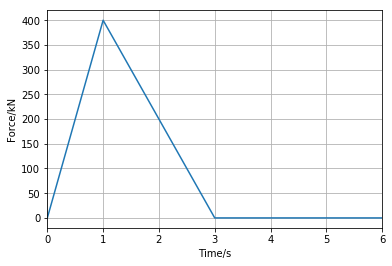

In [8]:
plt.plot(t, p/1000)
plt.xlabel('Time/s')
plt.ylabel('Force/kN')
plt.xlim((t0,t3))
plt.grid();

The main (and only) loop in our code, we initialize `A`, `B` and a container for saving the deflections `x`,
then we compute the next values of `A` and `B`, the next value of `x` is eventually appended to the container.

In [7]:
A, B, x = 0, 0, [0]

for i, _ in enumerate(t[1:], 1):
    A = A*edt+fac*(cp[i-1]*edt+cp[i])
    B = B*edt+fac*(sp[i-1]*edt+sp[i])
    x.append(A*s[i]-B*c[i])

It is necessary to plot the response.

In [ ]:
x = np.array(x)

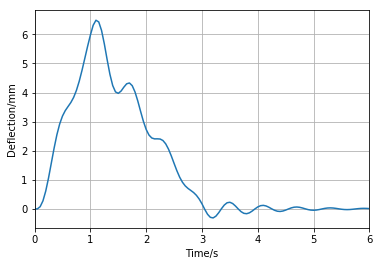

In [9]:
plt.plot(t, x*1000)
plt.xlabel('Time/s')
plt.ylabel('Deflection/mm')
plt.xlim((t0,t3))
plt.grid()
plt.show();